# Задания

1. Для случайных 10 скважин выведите столбцевые графики их добычи по времени. Добавить подписи осей, легенду, сетку координат.  
2. Выделите цветом те месяцы добычи, когда производство в сравнении с предыдущим месяцем увеличилось более чем на 10% (production.csv).  
3. Добавьте линейный график скользящего среднего с окном 3 и 5 (можно использовать метод rolling у класса Series).
4. Исследовать зависимость добычи за первый год от числовых величин (pairplot, матрица корреляции) и от категориальных (boxplot по каждой величине на одном графике).  

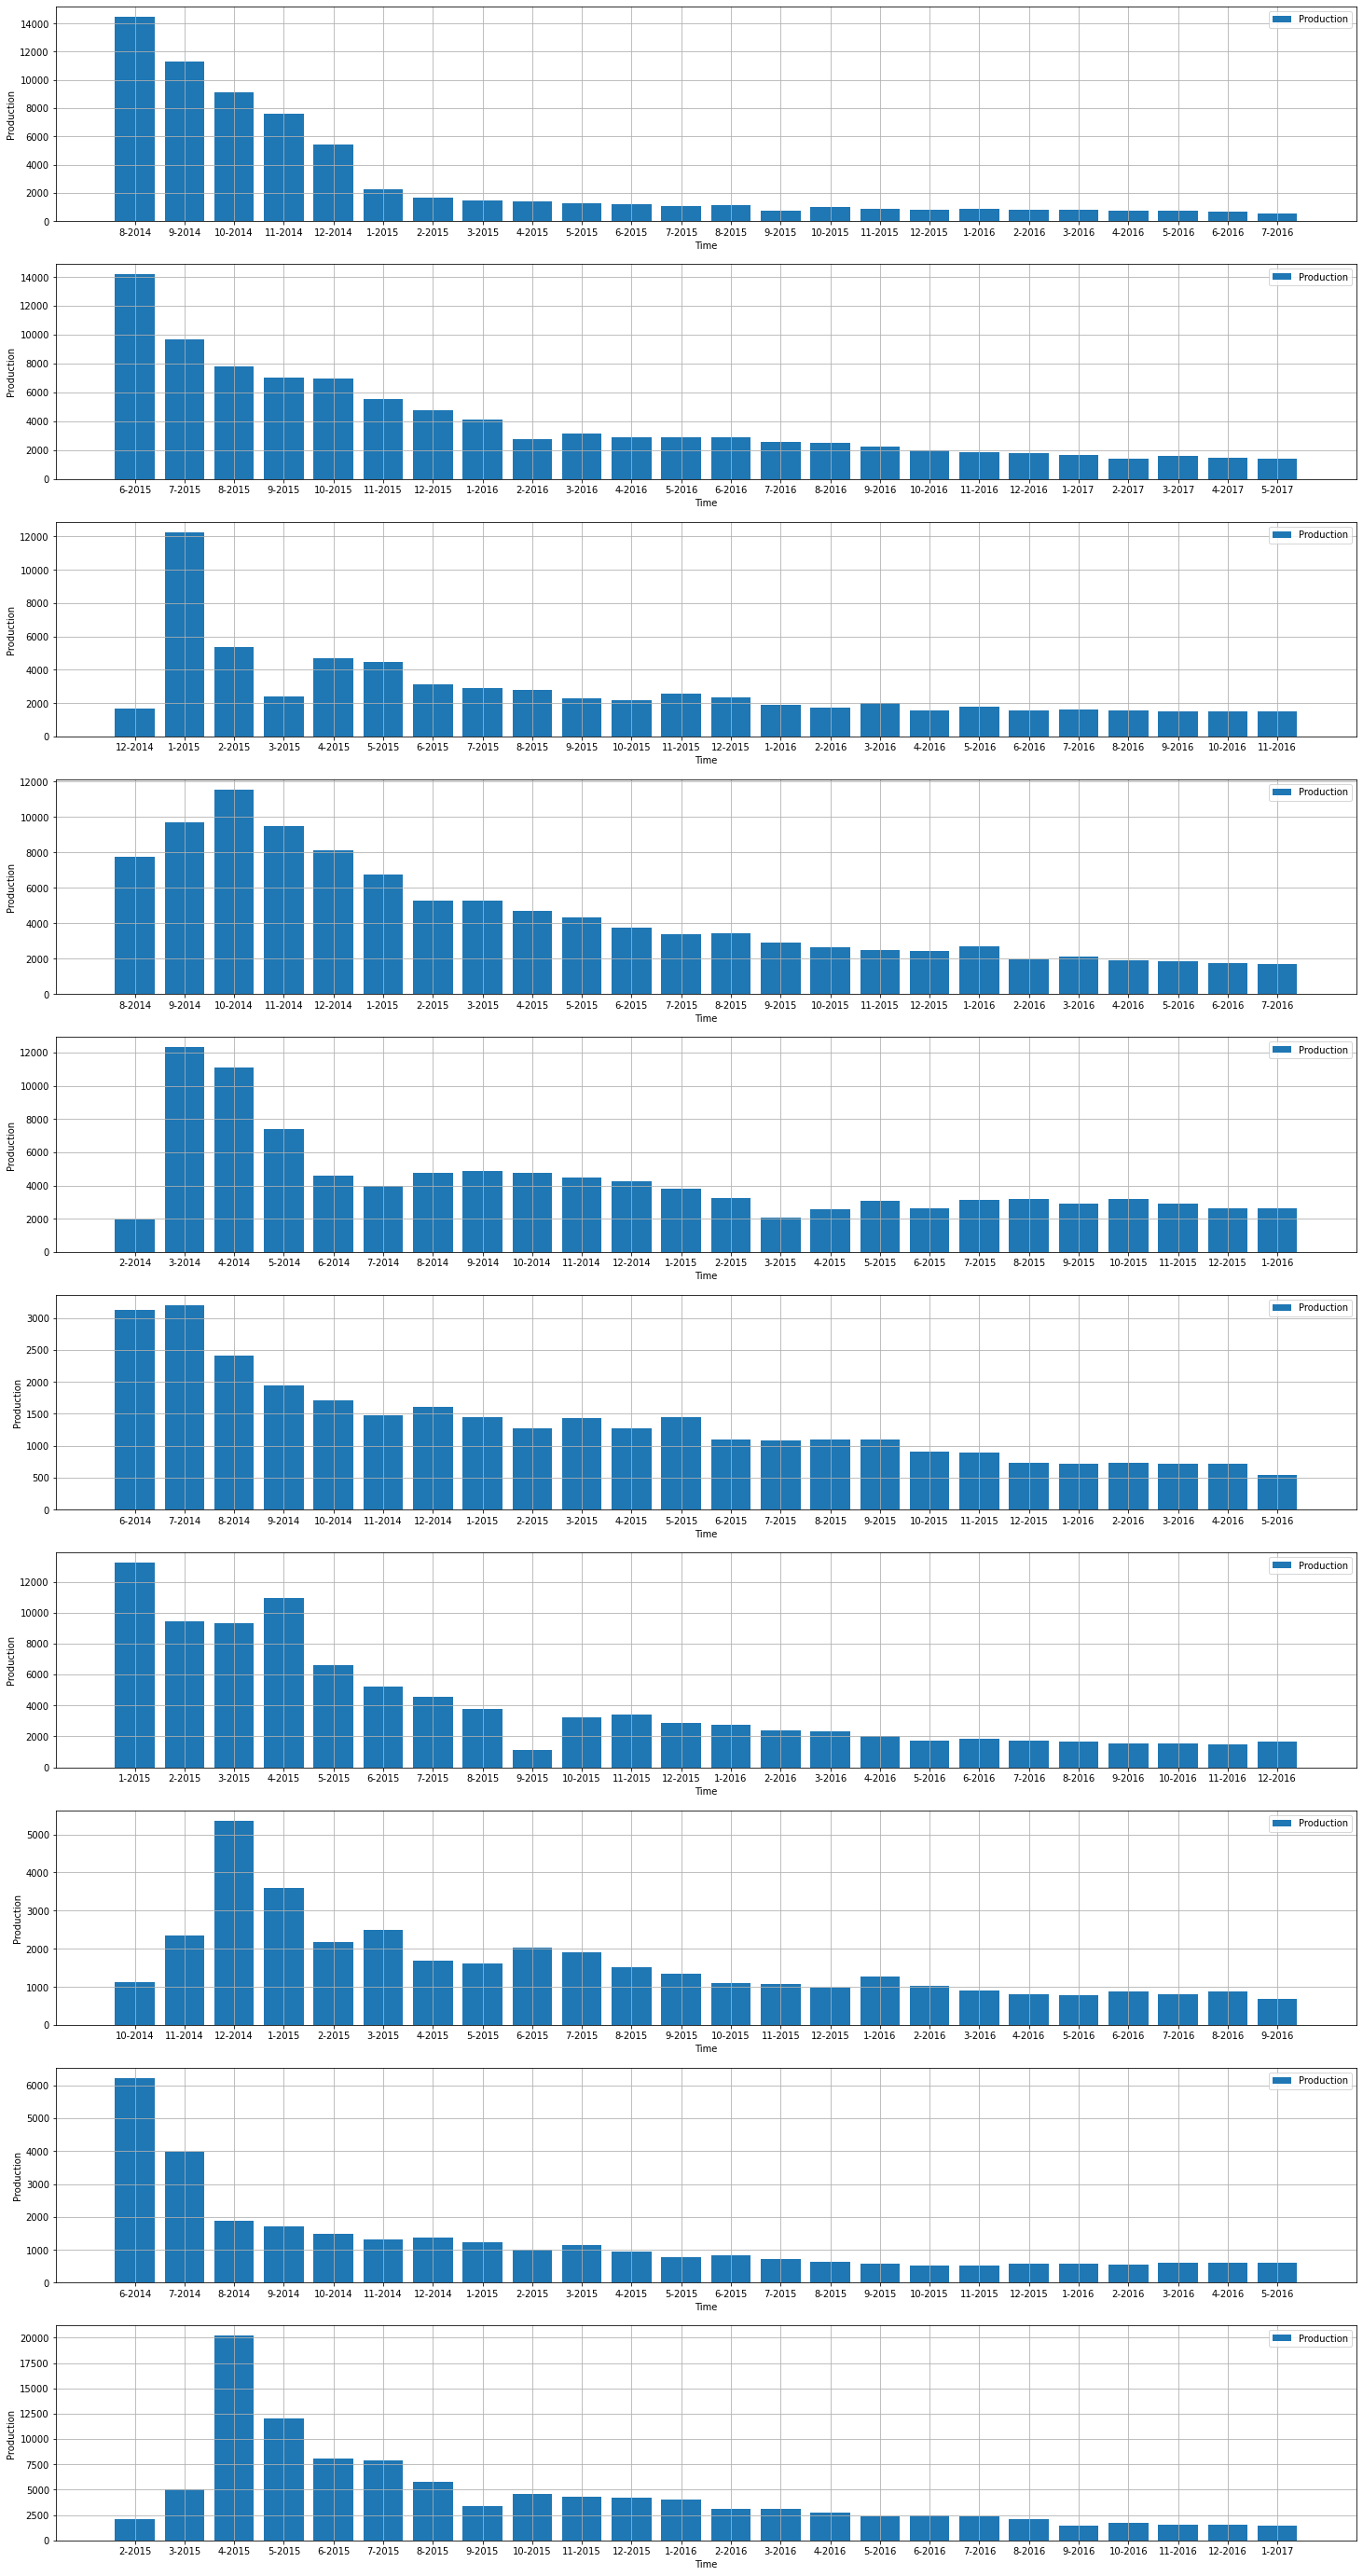

In [1]:
# 1. Для случайных 10 скважин выведите столбцевые графики их добычи по времени. Добавить подписи осей, легенду, сетку координат. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

production_df = pd.read_csv('data/production.csv')
production_df['Time'] = production_df['Month'].apply(str) + '-' + production_df['Year'].apply(str)

id_wells = pd.unique(production_df['API'])
np.random.seed(18182)
random_wells = np.random.choice(id_wells, 10, replace = False)
fig, axes = plt.subplots(nrows = 10, ncols = 1, figsize = (25,50))

for row, ax in enumerate(axes):
        ax.bar(production_df.loc[production_df['API'] == random_wells[row],'Time'],
        production_df.loc[production_df['API'] == random_wells[row],'Liquid'])
        ax.grid()
        ax.legend(['Production'])
        ax.set_xlabel('Time')
        ax.set_ylabel('Production')
    

C:\Users\gnome\AppData\Local\Temp/ipykernel_11108/719681613.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_df['match'] = well_df.Liquid >= 1.1 * well_df.Liquid.shift() # True or False


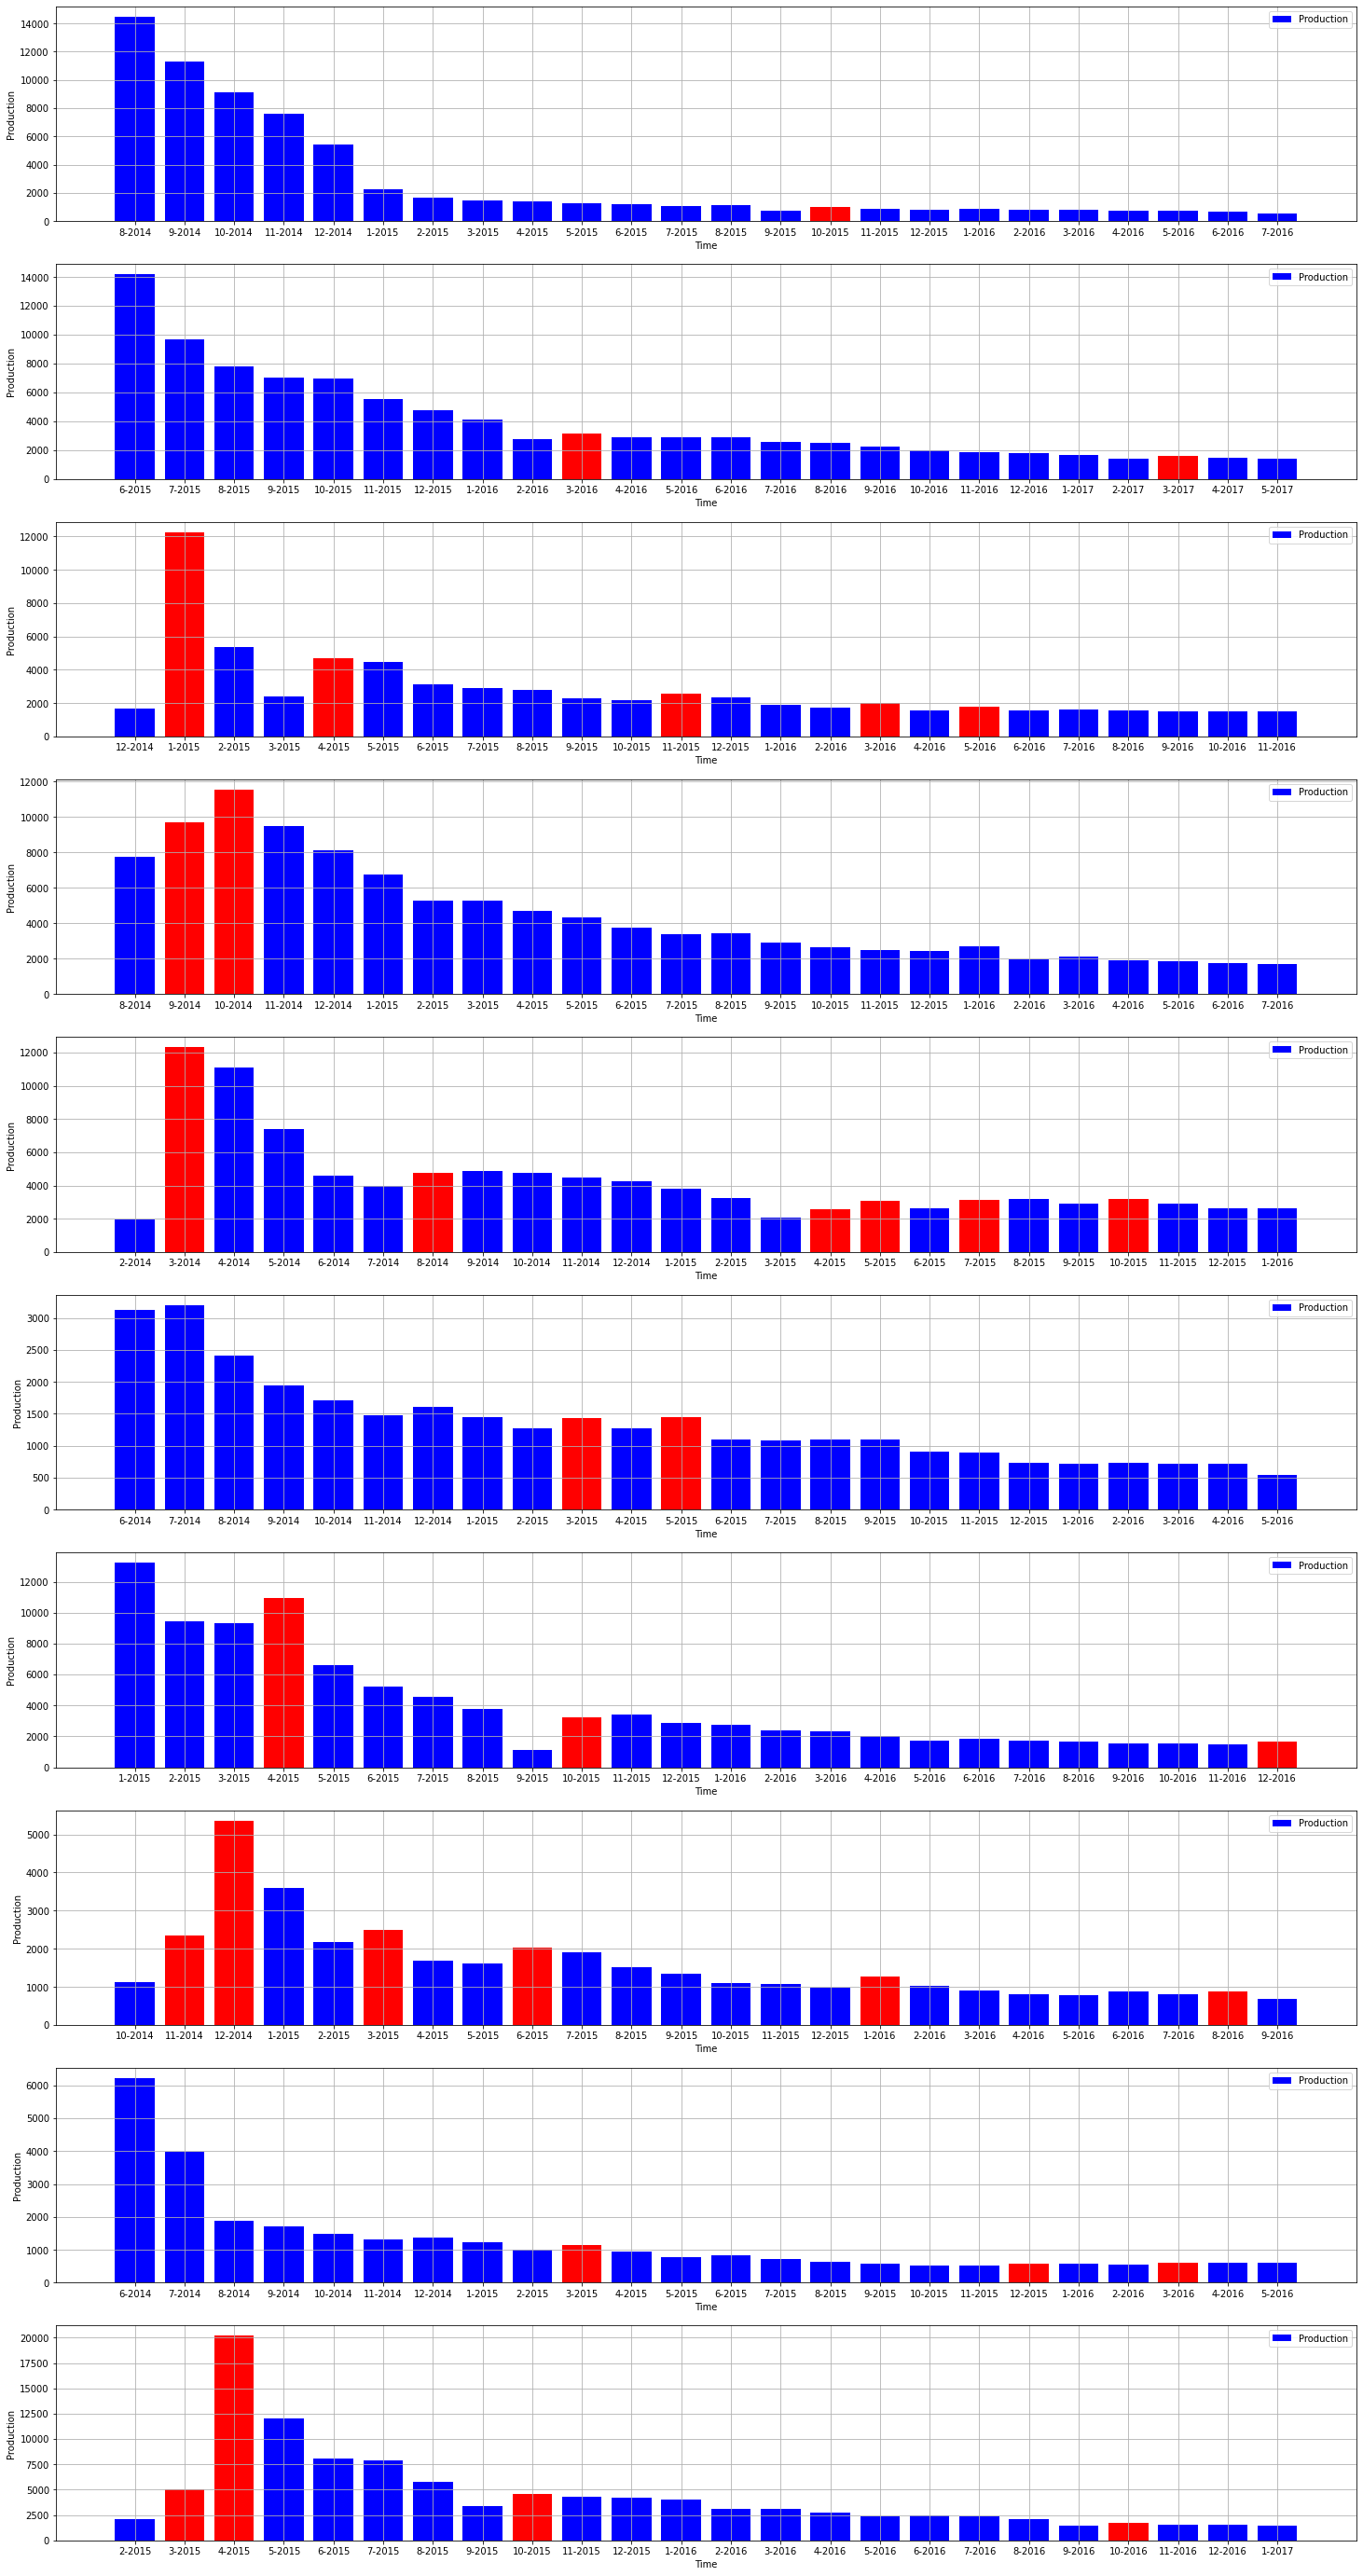

In [17]:
# 2. Выделите цветом те месяцы добычи, когда производство в сравнении с предыдущим месяцем увеличилось более чем на 10% (production.csv). 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

production_df = pd.read_csv('data/production.csv')
production_df['Time'] = production_df['Month'].apply(str) + '-' + production_df['Year'].apply(str)

id_wells = pd.unique(production_df['API'])
np.random.seed(18182)
random_wells = np.random.choice(id_wells, 10, replace = False)
fig, axes = plt.subplots(nrows = 10, ncols = 1, figsize = (25,50))

colors = []

for num, ax in enumerate(axes):
    well_df = production_df[production_df['API'] == random_wells[num]]
    well_df['match'] = well_df.Liquid >= 1.1 * well_df.Liquid.shift() # True or False
    
    for row in well_df['match']:
        if row == True:
            colors.append('r')
        else:
            colors.append('b')
            
    ax.bar(production_df.loc[production_df['API'] == random_wells[num],'Time'],
        production_df.loc[production_df['API'] == random_wells[num],'Liquid'], color = colors)
    ax.grid()
    ax.legend(['Production'])
    ax.set_xlabel('Time')
    ax.set_ylabel('Production')
    colors = []
fig    

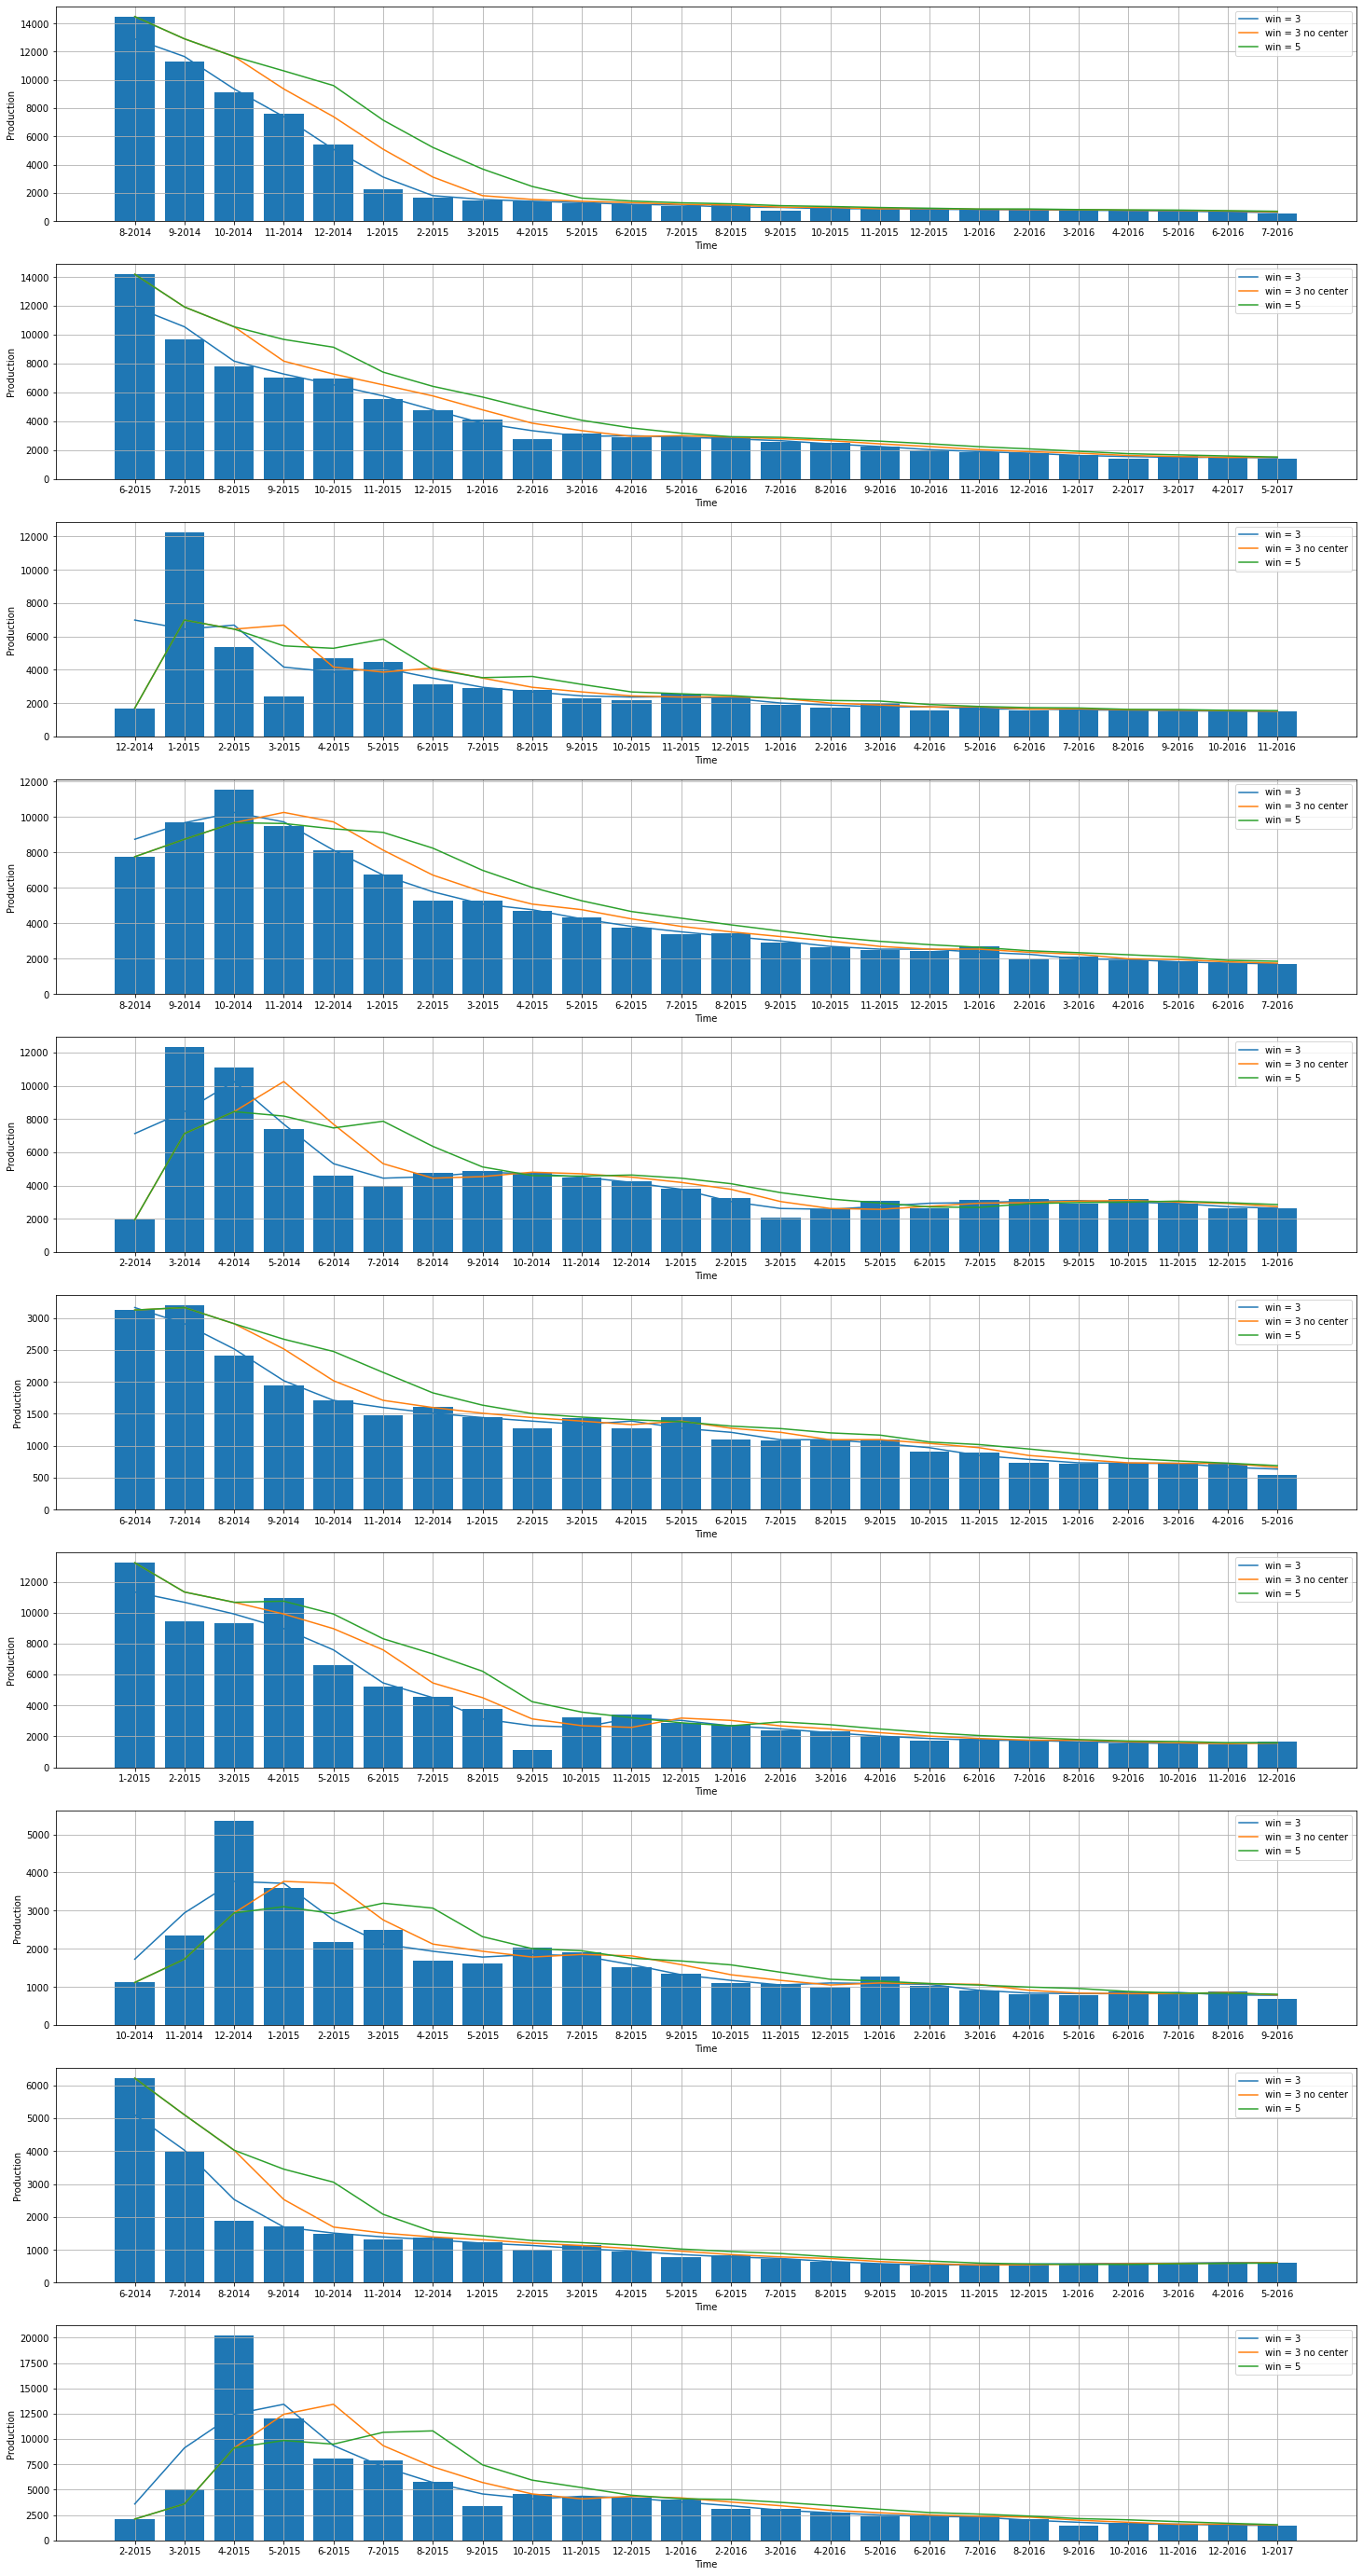

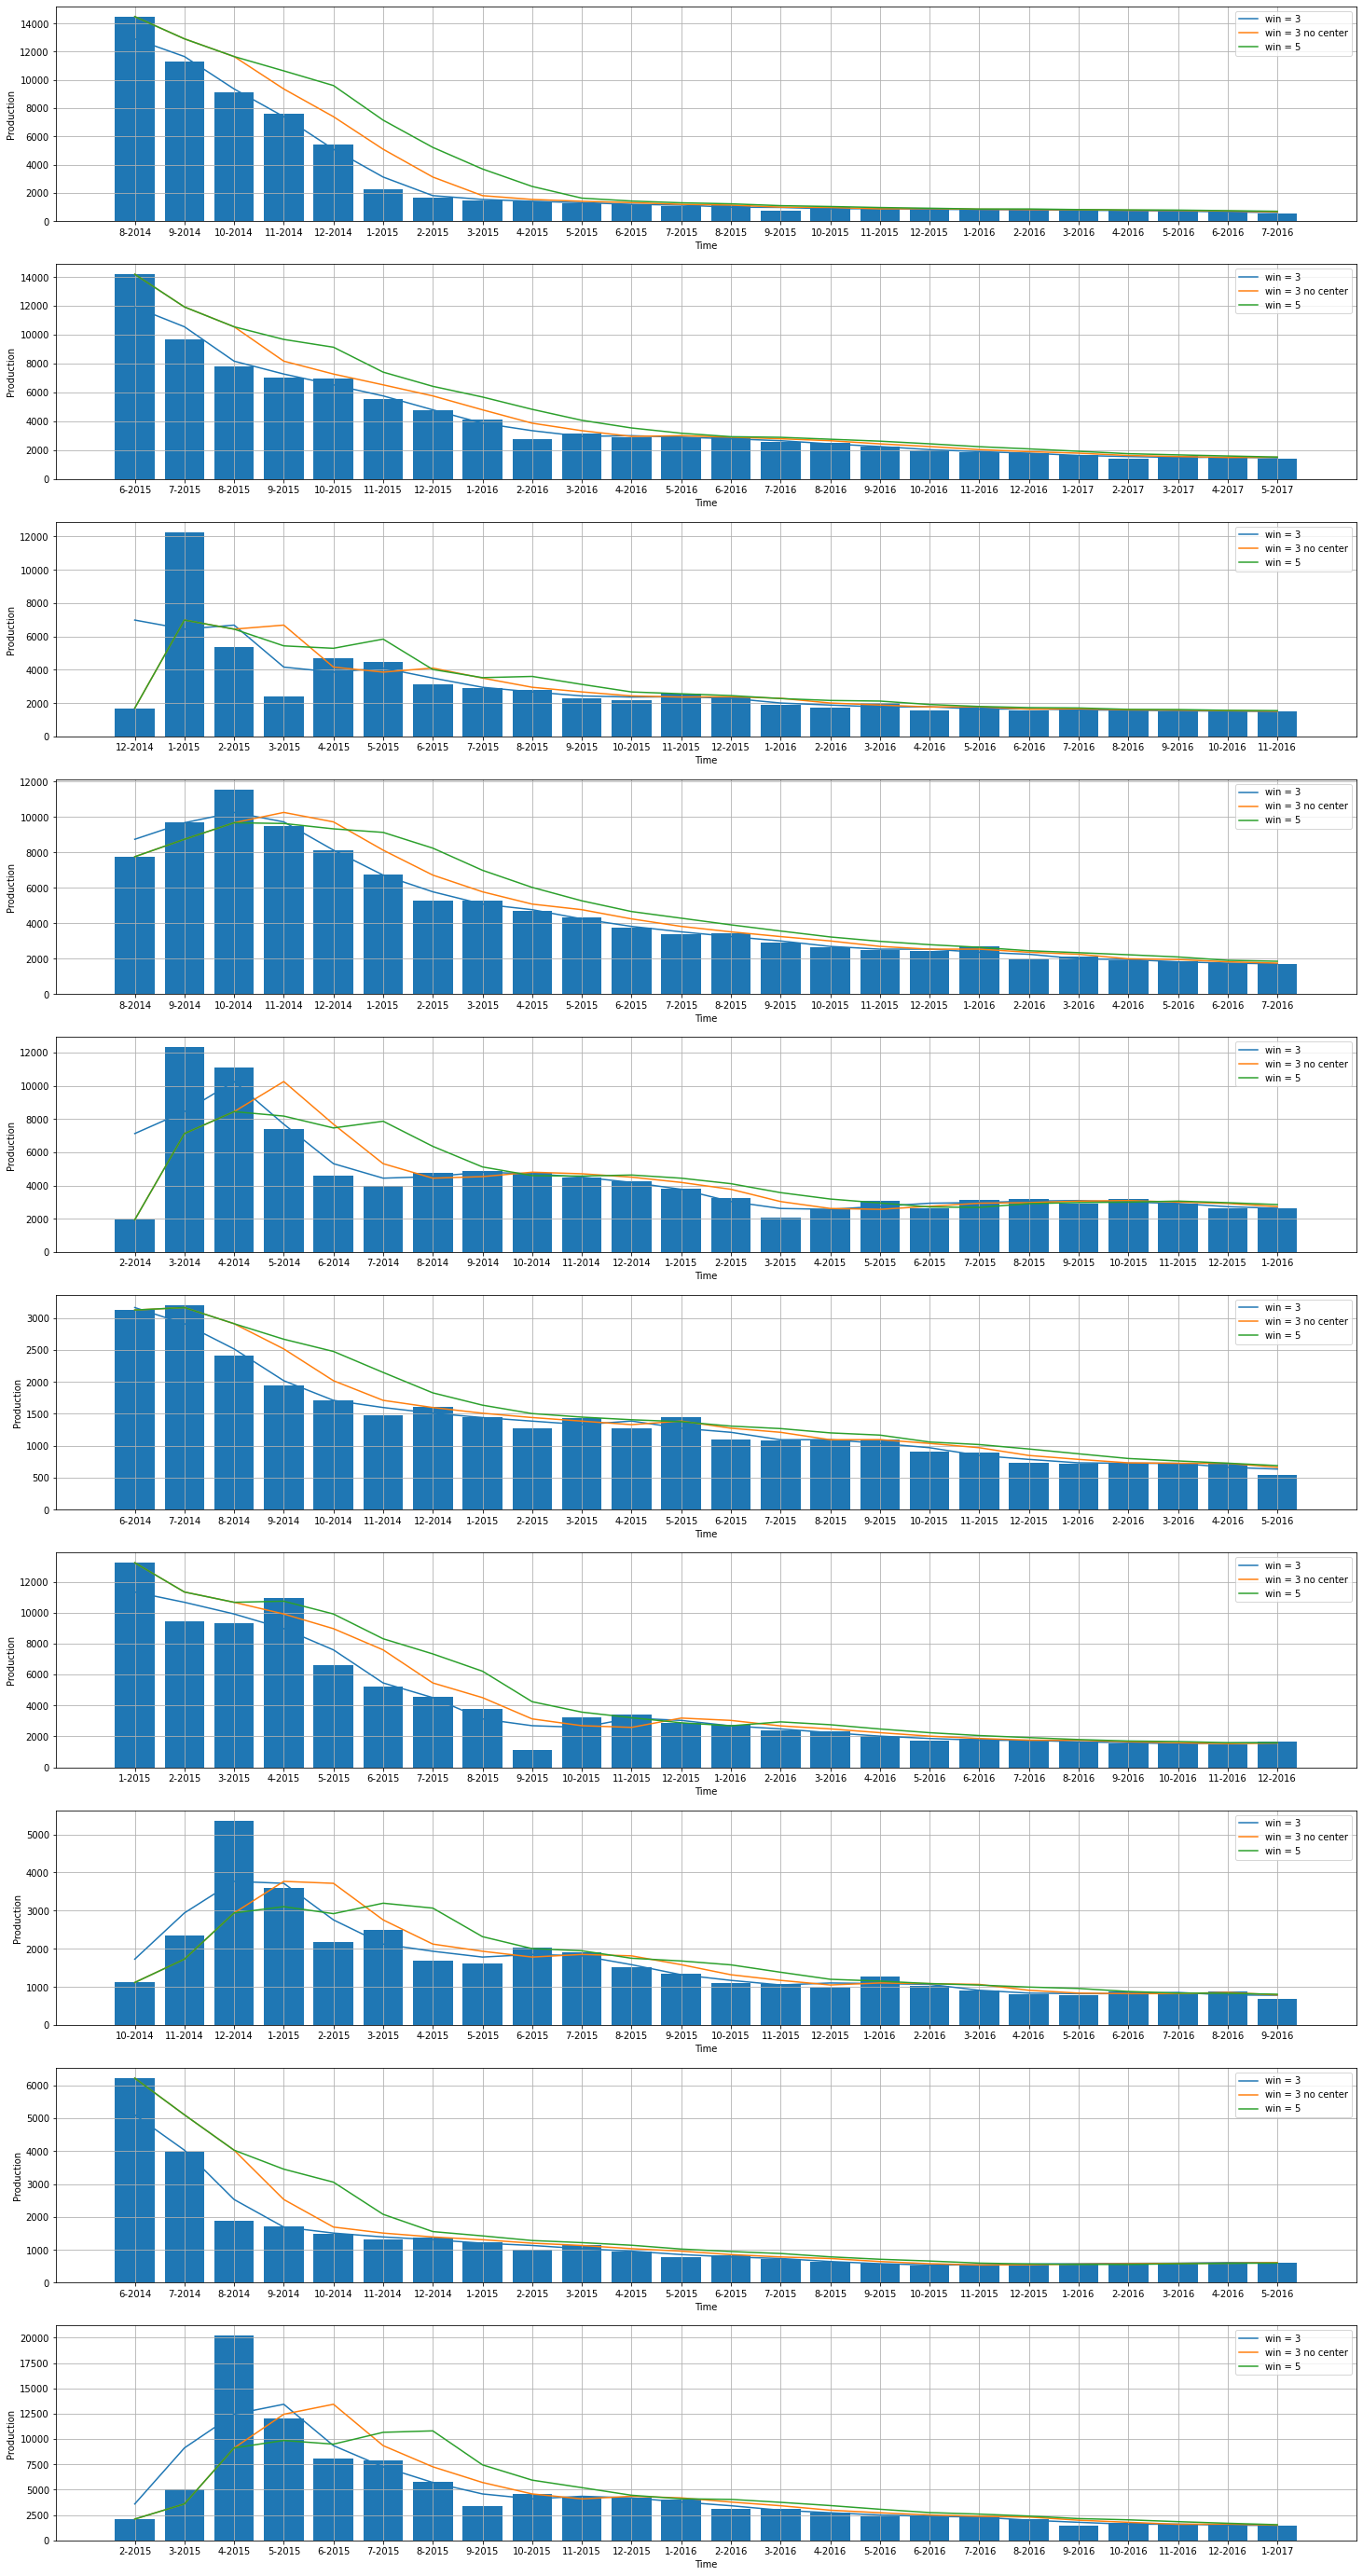

In [10]:
# 3. Добавьте линейный график скользящего среднего с окном 3 и 5 (можно использовать метод rolling у класса Series). 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

production_df = pd.read_csv('data/production.csv')
production_df['Time'] = production_df['Month'].apply(str) + '-' + production_df['Year'].apply(str)

id_wells = pd.unique(production_df['API'])
np.random.seed(18182)
random_wells = np.random.choice(id_wells, 10, replace = False)
fig, axes = plt.subplots(nrows = 10, ncols = 1, figsize = (25,50))

for num, ax in enumerate(axes):        
    sr = pd.Series(production_df.loc[production_df['API'] == random_wells[num],'Liquid'])
    index = production_df.loc[production_df['API'] == random_wells[num], 'Time']
    sr.index = index
    with_win3 = sr.rolling(3, center=True, min_periods=1).mean()
    with_win3_noCenter = sr.rolling(3, min_periods=1).mean()
    with_win5 = sr.rolling(5, min_periods=1).mean()
    ax.plot(with_win3, label = 'win = 3')
    ax.plot(with_win3_noCenter, label = 'win = 3 no center')
    ax.plot(with_win5, label = 'win = 5')
    ax.legend()
    
    ax.bar(production_df.loc[production_df['API'] == random_wells[num],'Time'],
    production_df.loc[production_df['API'] == random_wells[num],'Liquid'])
    ax.grid()
    ax.set_xlabel('Time')
    ax.set_ylabel('Production')
fig

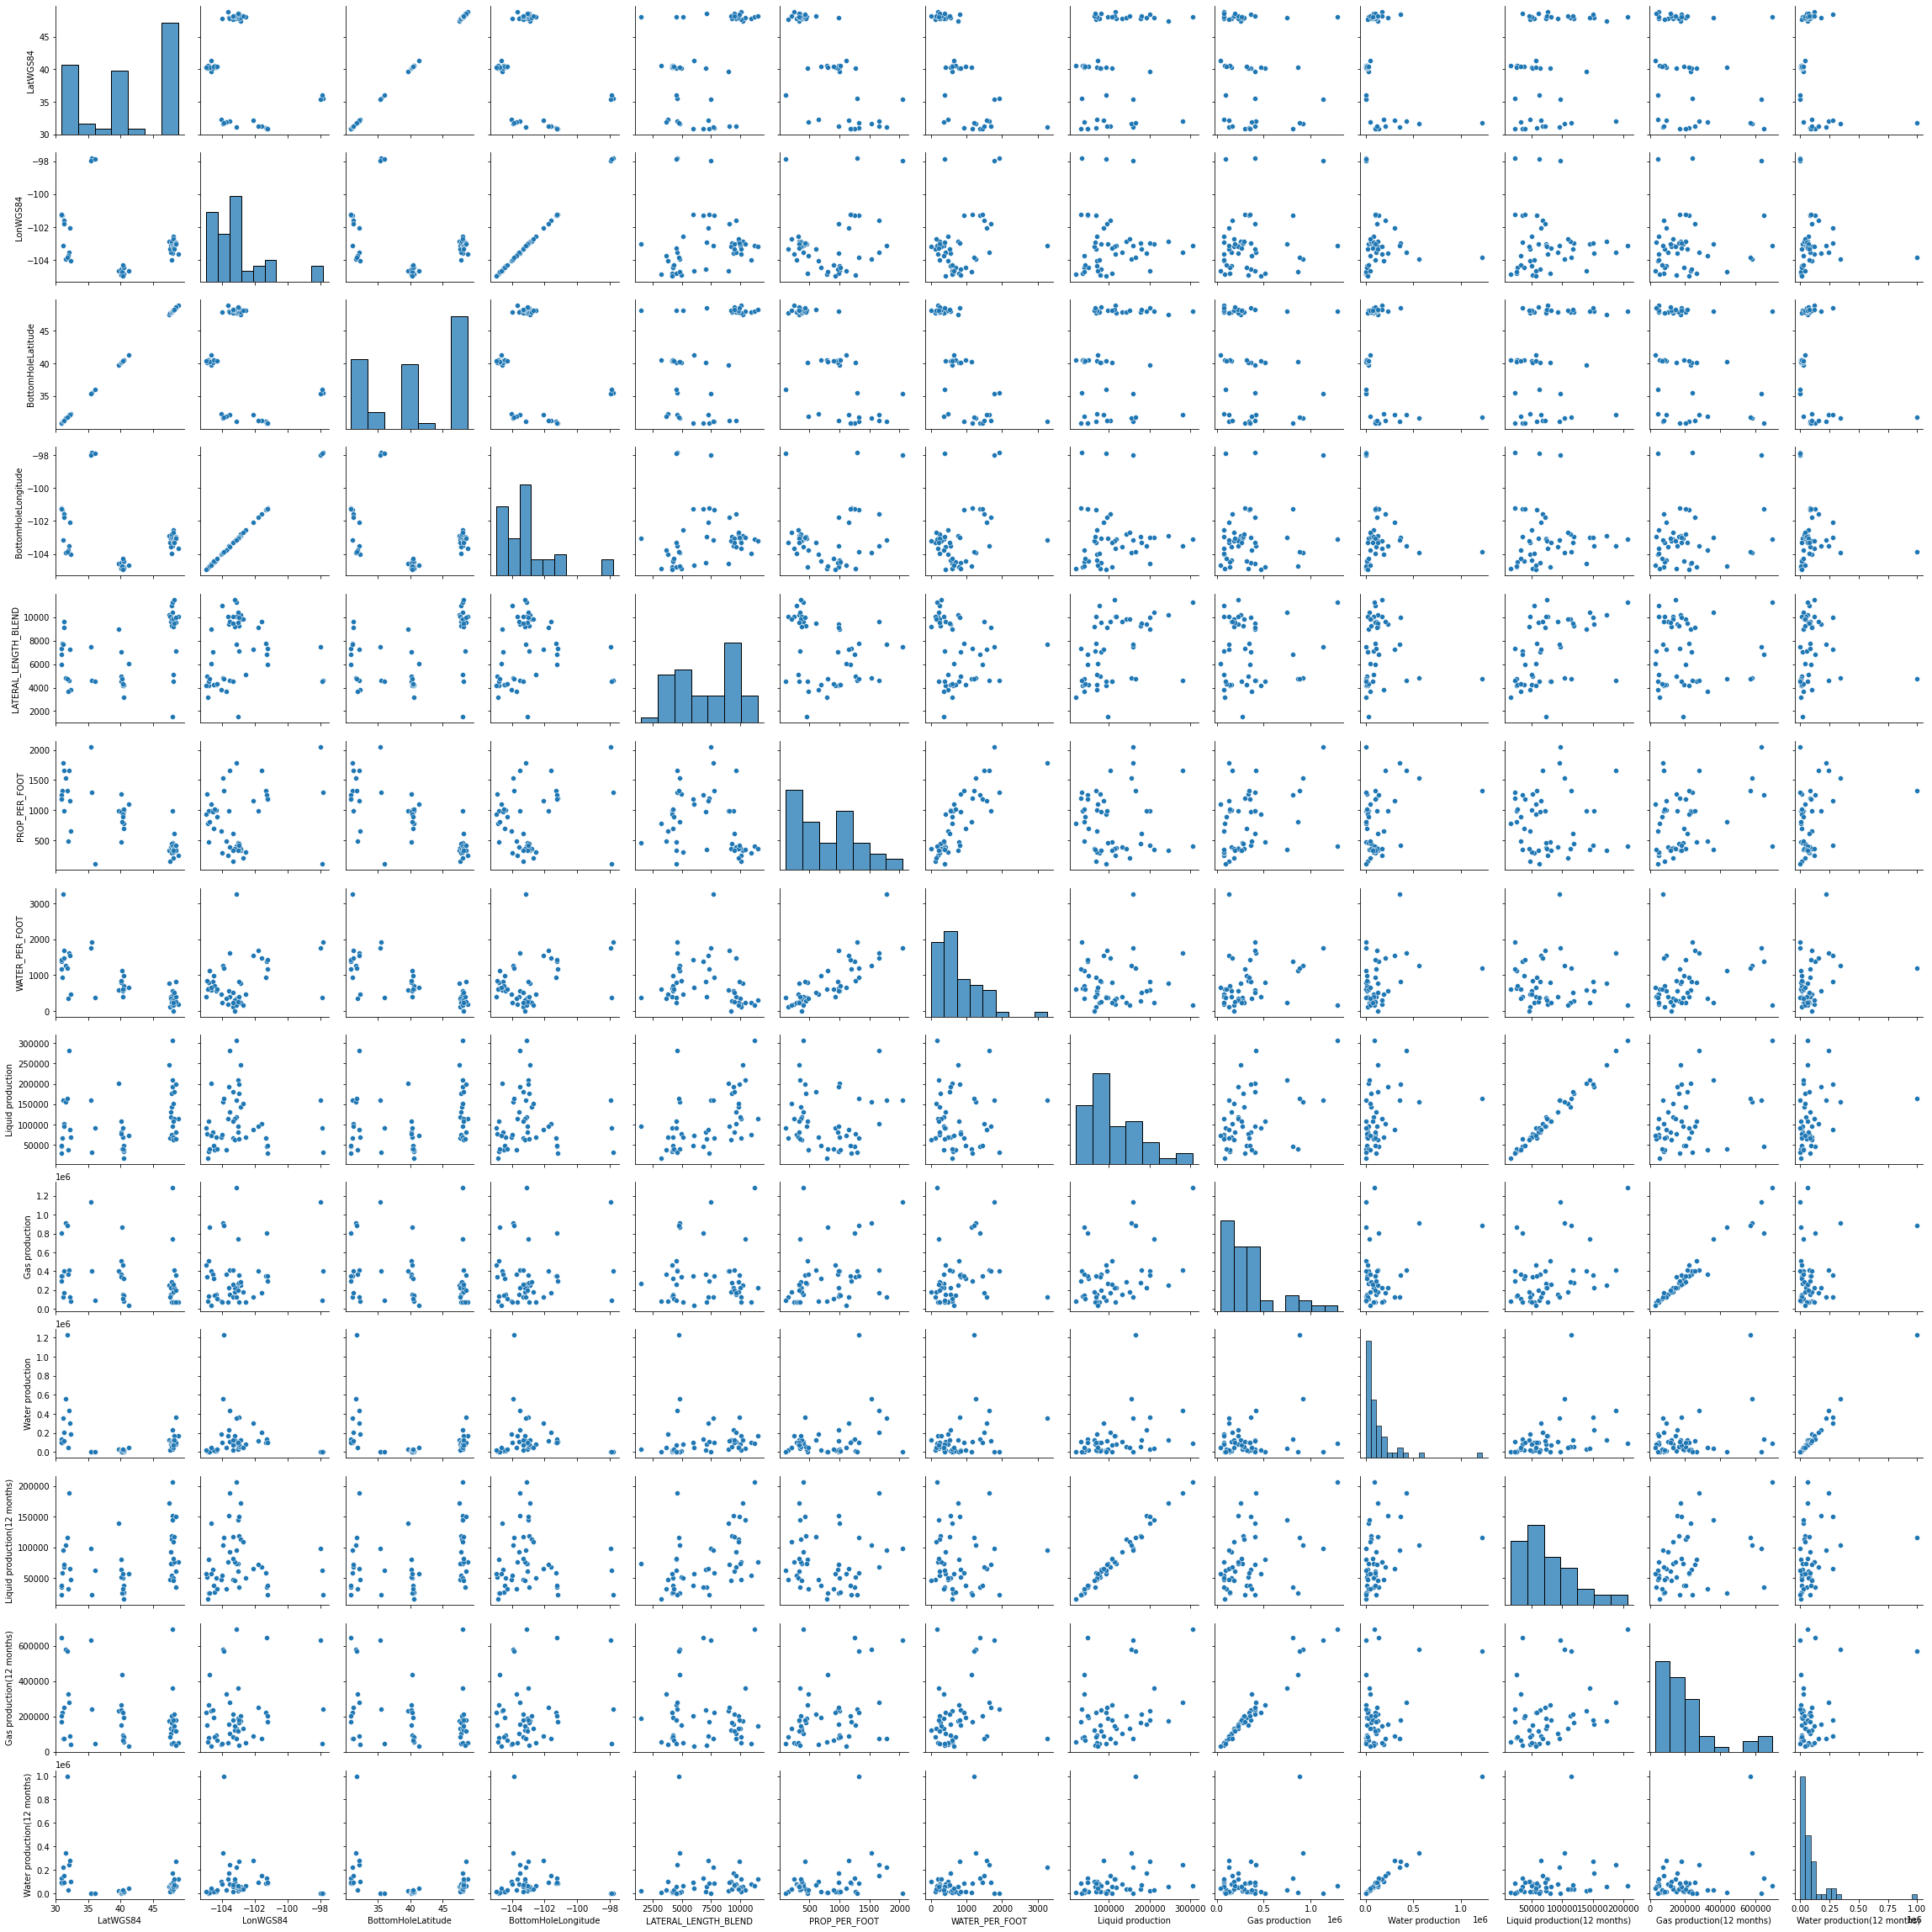

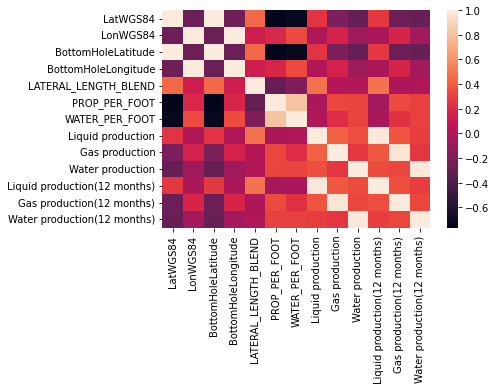

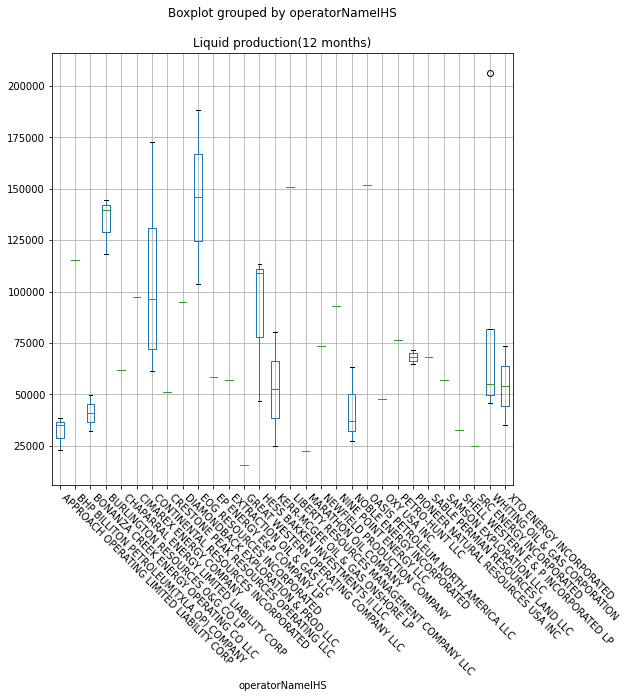

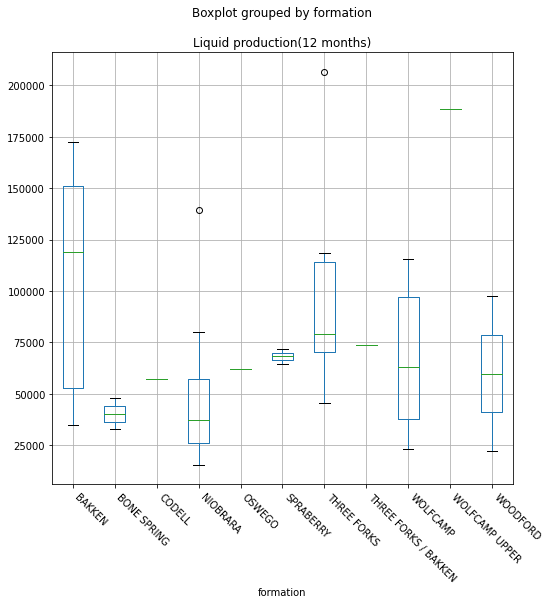

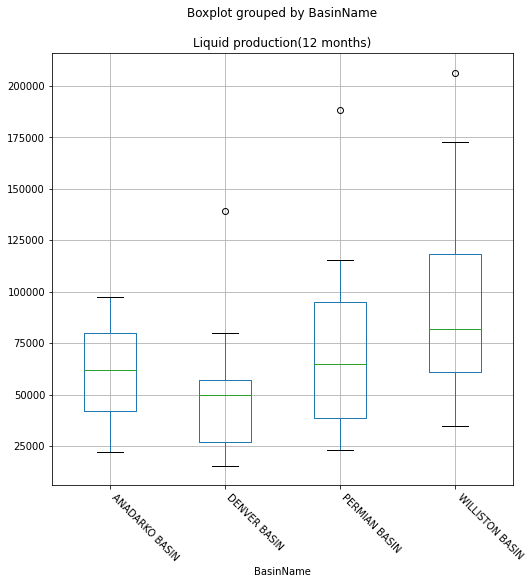

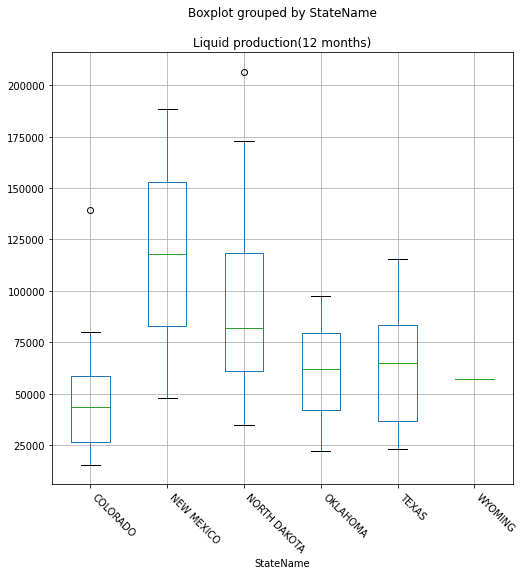

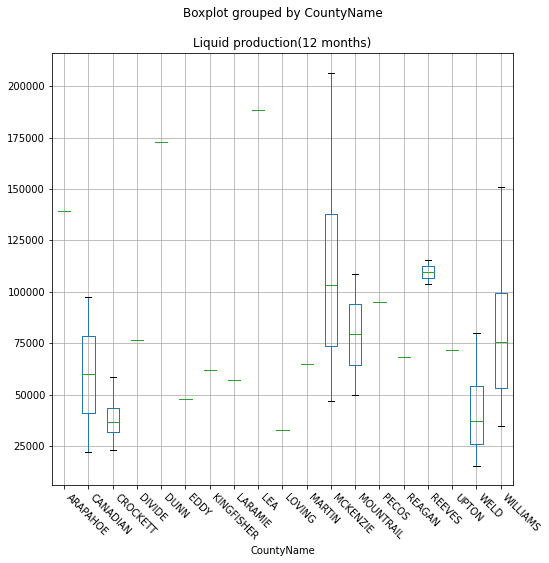

In [6]:
# 4. Исследовать зависимость добычи за первый год от числовых величин (pairplot, матрица корреляции) 
# и от категориальных (boxplot по каждой величине на одном графике). 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

#production_df = pd.read_csv('data/production.csv')
#production_df_OneYears = production_df.groupby("API").head(12)
#numeric_data = production_df_OneYears._get_numeric_data()
#numeric_data = numeric_data.drop(['API'], axis=1)

production_df = pd.read_csv('out.csv')
numeric_data = production_df._get_numeric_data()
numeric_data = numeric_data.drop(['API'], axis=1)
sns.pairplot(numeric_data)
plt.show()
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix)

#wells_info_df = pd.read_csv('out.csv')
#infoAndProd_df = pd.merge(wells_info_df, production_df, how='inner', on='API')
category = ['operatorNameIHS', 'formation', 'BasinName', 'StateName', 'CountyName']
for cat in category:
    production_df.boxplot('Liquid production(12 months)', by=cat, figsize=(8, 8))
    plt.xticks(rotation=-45, ha='left')